## Исследование данных о российском кинопрокате



**Описание проекта анализа рынка российского кинопроката**

**Заказчик проекта**:
Министерство культуры Российской Федерации.

**Цель проекта**:
Исследование рынка российского кинопроката с целью выявления текущих трендов, с особым вниманием к фильмам, получившим государственную поддержку. Основная задача - оценить интерес зрителя к таким фильмам.

**Исходные данные для анализа**:
Для выполнения проекта предоставлены данные, опубликованные на портале открытых данных Министерства культуры. Набор данных включает в себя информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также данные с сайта КиноПоиск.

**Этапы выполнения проекта**:

1. **Подготовка данных:**
   - Объединение файлов с данными в один датафрейм, обеспечивая включение всех объектов из датасета mkrf_movies.
   - Проверка типов данных и их преобразование при необходимости.
   - Анализ и обработка пропусков в данных.
   - Поиск и обработка дубликатов.
   - Корректировка категориальных и количественных значений, включая исправление проблемных значений и обработку подозрительных данных.
   - Добавление новых столбцов с информацией о годе проката, именем и фамилией главного режиссёра, основным жанром фильма и долей государственной поддержки от общего бюджета фильма.

2. **Исследовательский анализ данных:**
   - Анализ количества фильмов, выходивших в прокат каждый год, и доли фильмов с указанной информацией о прокате.
   - Изучение динамики проката по годам, включая анализ минимальных и максимальных сумм сборов.
   - Сравнение средних и медианных сумм сборов по годам.
   - Оценка влияния возрастного ограничения на сборы фильма в прокате.

3. **Анализ фильмов с государственной поддержкой:**
   - Исследование объемов государственной поддержки и окупаемости таких фильмов.
   - Анализ рейтинга фильмов с государственной поддержкой.

**Общий вывод**:
В ходе проекта будет проведен комплексный анализ рынка российского кинопроката с акцентом на фильмы, получившие государственную поддержку. Основываясь на данных о прокатных удостоверениях, сборах, государственной поддержке и рейтингах с КиноПоиска, будут выявлены ключевые тренды и предпочтения зрителей. Результаты исследования помогут заказчику - Министерству культуры Российской Федерации - в формировании стратегии развития отечественного кинематографа и распределении средств государственной поддержки.

### Шаг 1. Открытие файлов с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)

In [2]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv', parse_dates=['show_start_date'])
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Выведем общую информацию о каждом датафрейме, чтобы понять, по какому столбцу стоить объединять их.

In [3]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [4]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Как мы видим, столбец `puNumber` есть в обоих датафреймах, но типы данных в них разные - строка и целое число.

Заметим, что в столбце `puNumber` в датафрейме `data_movies` присутствует такое значение как "нет". Как поступить в данном случае? Проще изменить тип данных во втором датафрейме. Это никак не повлияет на дальнейшую работу.

In [5]:
data_shows['puNumber'] = data_shows['puNumber'].astype(str)

In [6]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Объединим датафреймы по этому столбцу:

In [7]:
data = pd.merge(data_movies, data_shows, on='puNumber', how='left')
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


#### Промежуточный вывод

## Промежуточный вывод

В этом шаге были выполнены следующие действия:

1. **Объединены данные:**
    - Объединили два датафрейма `data_movies` и `data_shows` с помощью функции `pd.merge`.Объединили по столбцу `puNumber`, который присутствовал в обоих датафреймах.
    - При этом, тип данных в столбце `puNumber` был изменен с целого числа на строку в датафрейме `data_shows`.
    - В результате получилось 7486 строк и 16 столбцов в объединенном датафрейме `data`.
2. **Изучены данные:**
    - Вывели информацию о столбцах датафреймов `data_movies` и `data_shows` с помощью функции `info`.
    - Это помогло нам понять, по какому столбцу стоит объединять датафреймы, и какой тип данных имеет каждый столбец.
    - Также мы заметили, что в столбце `puNumber` датафрейма `data_movies` присутствует значение `нет`. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Взглянем на хитмап пропусков в данных по каждому стобцу в процентах:

In [9]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


#####  Студия-производитель

В столбце `film_studio` всего 0.2% пропусков. Это достаточно маленькое значение, а значит, правильным решением будет удалить эти строки из датафрейма. То же самое ждет и столбец `director` - там пропусков еще меньше.

Пару слов о том, как могли возникнуть пропуски в этих столбцах. Скорее всего, данные просто не были добавлены в датасет, так как обычно режиссер и студия-производитель есть у любого фильма. С достаточно большим шансом мы можем сказать, что виноват человеческий фактор.

In [10]:
data = data.dropna(subset=['film_studio', 'director']).reset_index(drop=True)
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,7.600000
age_restriction,0.000000
refundable_support,95.500000


##### Продюсер

Приличный процент значений в столбце с продюсером отсутствует. С чем это может быть связано? Посмотрим на эти данные:

In [11]:
data_prod_nan = data.query('producer.isna() == True')
data_prod_nan.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Что объединяет все эти данные? Предположительно, они были сняты во времена СССР, либо же имеют достаточно много стран производства. Убедимся в этом.

In [12]:
data_prod_nan['production_country'].unique()

array(['СССР', 'СССР, Венгрия', 'Чехословакия', 'США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия',
       'Франция - Италия - Великобритания - США', 'Чехия',
       'СССР, Финляндия', 'Великобритания - США', 'Япония',
       'СССР, Польша', 'СССР - Швейцария - Франция', 'Франция',
       'Великобритания', 'Австралия', 'Италия', 'Украина',
       'Франция-Бельгия', 'Мексика - Франция',
       'Великобритания - Германия', 'Россия', 'Иран',
       'Республика Узбекистан', 'Бразилия', 'Италия ', 'Франция - Россия',
       'Индонезия', 'СССР, ФРГ, Западный Берлин',
       'США - Канада - Афганистан - Бельгия - Франция',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Бельгия - Испания - Канада - Нидерланды',
       'СССР, Венгрия, ЧССР, ГДР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ',
       ' СССР   ', 'СССР     ', 'Индия - Мексика', 'СССР    ', ' С

Да, так и есть. В данном случае, никак заполнить пропуски мы не можем, ровно как и удалить строки из исходного датафрейма - потерям почти 8% данных.

Скорее всего, это связано с тем, что в Союзе продюсером чаще всего выступало государство или сама киностудия. А если кино снимало сразу несколько государств, то одного продюсера обычно и нет. Следовательно, эти данные не нуждаются в заполнении. 

##### Государственная поддержка

Следующие несколько столбцов связаны с государственной поддержкой кино. Взглянем на эти данные:

In [13]:
data.query('budget.isna() == False').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365354
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,NaN,28140
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957032
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55918
1789,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100


Да, действительно все эти фильмы сняты в России. В таком случае эти столбцы мы снова трогать не будем - они будут отдельно изучены во время проведения исследовательского анализа данных.

Причина пропуска в данных - принадлежность некоторых фильмов к РФ.

##### Рейтинг и жанры

In [14]:
data.query('ratings.isna() == True').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Каких-то закономерностей не наблюдается. Вероятно, значения были потеряны при создании исходных датасетов. Кстати, это же произошло со столбцом `genres`.

Правильным решением в данном случае будет заполнить пропуски медианным значением рейтинга.

In [15]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Напишем фукнцию, которая конвертирует значения в процентах в значения по десятибалльной шкале:

In [16]:
def convert_percentage(percentage_str):
    if isinstance(percentage_str, str):
        if '%' in percentage_str:
            number = float(percentage_str.replace('%', ''))
            return number / 10
        
        else:
            try:
                return float(percentage_str)
            except ValueError:
                return None
            
    elif pd.isna(percentage_str):
        return percentage_str
    
    else:
        return percentage_str
    
data['ratings'] = data['ratings'].apply(convert_percentage)
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [17]:
data['ratings'].median()

6.6

Названия жанра так же заполнить не получится, так что придется оставить их пустыми.

In [18]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,7.600000
age_restriction,0.000000
refundable_support,95.500000


#####  Сборы

Большой процент пропусков в столбце со сборами связан с тем, что многие фильмы не были в прокате в России (не имели прокатного удостоверения в списке `mkrf_shows`. 

Заполнить пропуски нельзя - сборы конкретное значение для каждого фильма.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим наличие явных пропусков:

In [19]:
data.duplicated().unique()

array([False])

Явные дубликаты отсутствуют, теперь рассмотрим важные столбцы. К примеру, `title` - название. Также стоит изучать столбец с прокатными удостоверениями. Остальные столбцы нет смысла рассматривать, так как режиссеры, продюсеры, страны и т.п. могут повторяться и в данном случае являются некоторыми идентификаторами, хоть и являются дубликатами с точки зрения анализа данных.

In [20]:
len(data['title'])

7460

In [21]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный",759526
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный",1125302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,детектив,криминал",NaN
7390,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"комедия,приключения,детектив",NaN
7412,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"триллер,драма",175004
7424,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"триллер,криминал,детектив",NaN


Чтобы данные при анализе не оказались искажены, придется удалить строки, где названия повторяются. 

Какая причина может быть у таких пропусков? Мы видим, что у фильмов с одинаковым названием отличается номер прокатного удостоверения и дата выхода. Как так? Разные даты выхода? Да, очень часто фильмы выходят в прокат несколько раз в течение какого-то срока. Это не было учтено при формировании датасета, поэтому и появились вот такие дубликаты. То же самое и с прокатным удостоверением - оно тоже обновляется.

In [22]:
#3158

duplicates_with_different_box_office = data.groupby('title').filter(lambda x: x['show_start_date'].nunique() > 1)

duplicates_with_different_box_office

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,детектив,криминал",NaN
7390,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"комедия,приключения,детектив",NaN
7412,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"триллер,драма",175004
7424,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"триллер,криминал,детектив",NaN


In [23]:
data['box_office'].describe()

count         3156
mean      76527135
std      240421585
min              0
25%          87443
50%        2334077
75%       23989289
max     3073568691
Name: box_office, dtype: float64

In [24]:
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4631,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"драма,мелодрама,история",NaN
5058,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"комедия,криминал",NaN


Вместе с дубликатами в названиях пропали и дубликаты в прокатных удостоверениях.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### Исправляем тип фильма

In [25]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [26]:
data['type'] = data['type'].str.strip()

In [27]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Что общего у категориальных значений?

Как минимум, данные в некоторых столбцах по-разному. Например, в столбце `production_country` часть значений через запятую, а другая - через тире. Это нужно исправить, ведь существует вероятность, что один и тот же набор стран будет учтен несколько раз. А еще кое-где спрятался год выхода. Исправим это:

In [28]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [29]:
data = data.apply(lambda x: x.replace({' - ': ', ', 
                                       '-' : ', ',
                                       'Сша' : 'США',
                                      }, regex=True))
data = data.drop(data[data['production_country'] == '2019'].index)

In [30]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [31]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [32]:
data = data.apply(lambda x: x.replace({',' : ', '}, regex=True))

data['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', nan,
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, комедия, кр

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

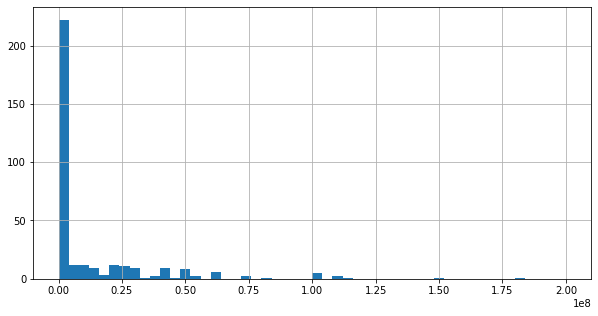

In [33]:
data['refundable_support'].hist(bins=50, range=(0, 200_000_000), figsize=(10, 5));

Взглянув на график мы сразу видим, что более двухсот фильмов имеют 0 в графе обязательных для возврата средств государственной поддержки. 

В основнов, сумма, выделенная госудраством на долговой основе не превышает 75 млн рублей. Но встречаются и выбросы - 180 млн. Делать с ними что либо не имеет смысло, так как это не повлияет на анализ данных.

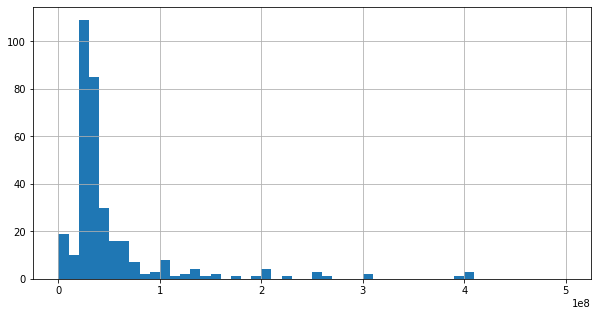

In [34]:
data['nonrefundable_support'].hist(bins=50, range=(0, 500_000_000), figsize=(10, 5));

Порядка 110 фильмов получили безвозмездную государственную поддержку в размере от 20 до 30 млн рублей. Далее - от 30 до 40 млн гос.поддержки получили более 80 фильмов. 

Выбросы так же присутствуют, но это снова не критично.

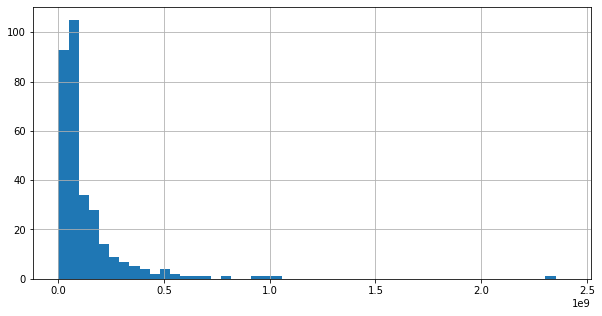

In [35]:
data['budget'].hist(bins=50, range=(1, 2_400_000_000), figsize=(10, 5));

Почти 2.5 миллиарда на фильм?

In [36]:
data.query('budget > 2_000_000_000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7088,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин","«6+», для детей старше 6 лет",180000000,90000000,2305074303,Фонд кино,6,"приключения, фэнтези",333597060


Да, такое кино действительно существует. Значит, это снова не случайный выброс - оставим такой экземпляр.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [37]:
data['year_of_show'] = data['show_start_date'].dt.year
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пик...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,"«6+», для детей старше 6 лет",NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [38]:
def get_main(main_value):
    if isinstance(main_value, str):
        return main_value.split(',')[0]
    else:
        return main_value  
    
data['main_director'] = data['director'].apply(get_main)
data['main_genre'] = data['genres'].apply(get_main)

data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пик...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,"«6+», для детей старше 6 лет",NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк ...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
def support(refundable, nonrefundable, budget):
    all_support = refundable + nonrefundable
    if budget == 0:
        return None
    else:
        return (all_support / budget) * 100

data['support_percent'] = data.apply(lambda x: 
                                     support(x['refundable_support'], x['nonrefundable_support'], x['budget']), axis=1)

data.query('budget > 1')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show,main_director,main_genre,support_percent
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел,...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко","«16+», для детей старше 16 лет",0,26500000,79411900,Министерство культуры,8,"драма, мелодрама",365354,2013,А.Атанесян,драма,33
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК, Студио""",Россия,А.Якимчук,А.Тютрюмов,"«12+», для детей старше 12 лет",0,26000000,37142857,Министерство культуры,NaN,NaN,28140,2014,А.Якимчук,NaN,70
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ, ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников","«12+», для детей старше 12 лет",0,107847945,176023490,Фонд кино,5,"комедия, фантастика",19957032,2013,Р.Давлетьяров,комедия,61
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,"«16+», для детей старше 16 лет",0,28000000,40574140,Министерство культуры,4,драма,55918,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69
1789,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова","«16+», для детей старше 16 лет",0,25000000,40015122,Министерство культуры,6,драма,232100,2014,М.Угаров,драма,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст","«12+», для детей старше 12 лет",100000000,400000000,980000000,Фонд кино,6,"история, биография, драма",717703186,2019,А.Кравчук,история,51
7440,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский","«6+», для детей старше 6 лет",100000000,0,190000000,Фонд кино,7,"мультфильм, приключения, семейный",501069235,2019,Д.Шмидт,мультфильм,53
7448,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Руд...","«12+», для детей старше 12 лет",100000000,400000000,944000000,Фонд кино,6,"фантастика, боевик",NaN,2019,Ф.Бондарчук,фантастика,53
7450,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,"«12+», для детей старше 12 лет",0,30000000,46154000,Министерство культуры,6,драма,NaN,2019,И.Северов,драма,65


#### Промежуточный вывод

На этом этапе удалось подготовить датасет для дальнейшего анализа. Перечислим все проделанные шаги:

**1. Проверка типов данных:**

* Обнаружены объекты разных типов данных, такие как строки, целые числа, даты, числа с плавающей точкой.
* Типы данных в датафрейме не требуют приведения к общему типу.

**2. Изучение пропусков:**

* Большинство пропусков присутствует в столбцах:
    * `film_studio`
    * `producer`
    * `refundable_support`
    * `nonrefundable_support`
    * `budget`
    * `financing_source`
    * `ratings`
    * `genres`
    * `box_office`
* Причины пропусков:
    * Отсутствие данных в исходном датасете.
    * Особенности организации кинопроизводства.
    * Документальные фильмы, которые не показывают в кинотеатрах.
    * Фильмы, не имеющие прокатного удостоверения в списке mkrf_shows.
* Обработка пропусков:
    * Удалены строки с пропусками в `film_studio` и `director`.
    * Значения в `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` оставлены для исследования государственной поддержки.
    * Пропуски в `ratings` заполнены медианным значением.
    * Пропуски в `genres` оставлены пустыми.
    * Пропуски в `box_office` оставлены как есть.

**3. Удаление дубликатов:**

* Обнаружены дубликаты строк, отличающиеся только датой выхода и номером прокатного удостоверения.
* Дубликаты удалены.

**4. Изучение категориальных значений:**

* Обнаружены проблемы с форматированием данных в некоторых столбцах.
* Проблемы исправлены.

**5. Проверка количественных значений:**

* Обнаружены выбросы в столбцах:
    * `refundable_support` (значения ~200 млн рублей)
    * `nonrefundable_support` (значения ~100 млн рублей)
    * `budget` (значения ~2 млрд рублей)
    * `box_office` (значения ~3 млрд рублей)
* Выбросы не устранены, так как не оказывают критического влияния на анализ.

**6. Добавление новых столбцов:**

* Созданы столбцы:
    * `year_of_show` - год проката фильма
    * `main_director` - имя главного режиссёра
    * `main_genre` - основной жанр фильма
    * `support_percent` - доля государственной поддержки в бюджете фильма

### Шаг 3. Исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

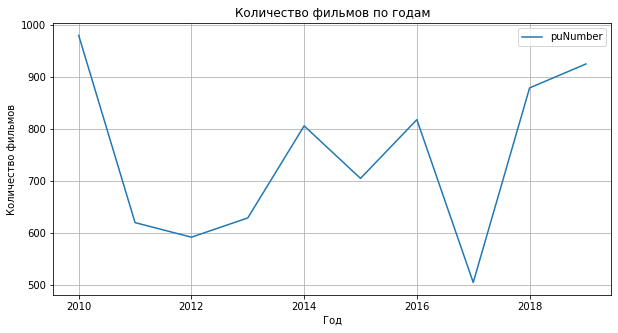

In [40]:
year_of_show_plot = (data.pivot_table(index='year_of_show', values='puNumber', aggfunc='count')
                     .plot(kind='line', figsize=(10, 5), grid=True))

year_of_show_plot.set_title('Количество фильмов по годам')
year_of_show_plot.set_xlabel('Год')
year_of_show_plot.set_ylabel('Количество фильмов')

plt.show()

Это общая информация о фильмах за каждый год. Больше всего фильмов, которые вышли в 2019 году, что позволяет сделать предположение о том, что это наиболее полно представлен в датасете.

Теперь посмотрим на такую же статистику по фильмам, которые выходили в прокат в кинотеатрах:

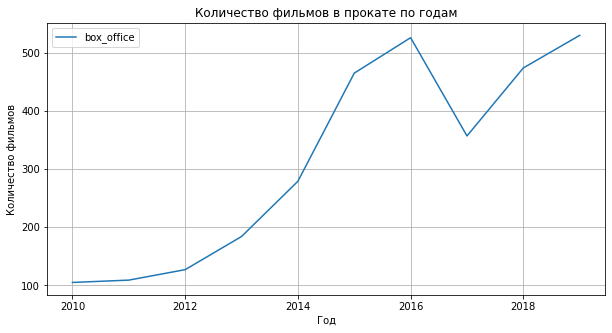

In [41]:
year_of_show_plot = (data.pivot_table(index='year_of_show', values='box_office', aggfunc='count')
                     .plot(kind='line', figsize=(10, 5), grid=True))

year_of_show_plot.set_title('Количество фильмов в прокате по годам')
year_of_show_plot.set_xlabel('Год')
year_of_show_plot.set_ylabel('Количество фильмов')

plt.show()

А тут картина немного меняется - 2016 и 2018 практически равны по количеству фильмов, вышедших в кинотеатрах. Но тем не менее, в 2019 фильмов снова вышло больше. Осталось посчитать долю фильмов, вышедших в прокат относительно всех.

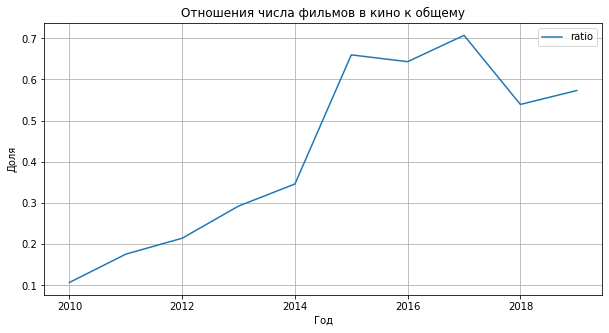

In [42]:
def percentage(in_show, all_films):
    return float(in_show / all_films)

percentage_by_year = data.pivot_table(index='year_of_show', values=['box_office', 'puNumber'], aggfunc='count').reset_index()
percentage_by_year['ratio'] = percentage_by_year.apply(lambda x: percentage(x['box_office'], x['puNumber']), axis=1)

percentage_by_year_plot = percentage_by_year.plot(x='year_of_show', y='ratio', kind='line', figsize=(10, 5), grid=True)
percentage_by_year_plot.set_title('Отношения числа фильмов в кино к общему')
percentage_by_year_plot.set_xlabel('Год')
percentage_by_year_plot.set_ylabel('Доля')

plt.show()
#percentage_by_year

Как мы видим, самое большое отношение наблюдается в 2016 году. Значит, мы можем сделать вывод о том, довольно значительная часть фильмов, которые вышли в этом году также были в прокате в российских кинотеатрах. 

Наиболее полно в датасете представлен 2019 год - почти 1000 фильмов в целом. \
С точки зрения фильмов в прокате самый полным является также 2019, но дальше за ним следуют 2016 и 2018 годы с небольшим отрывом.

Особенно интересным является 2016, так как именно в этом году процент фильмов, которые вышли в прокат выше, чем в остальные годы, представленные в датасете. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Динамика проката по количеству фильмов представлена в предыдущем пункте.

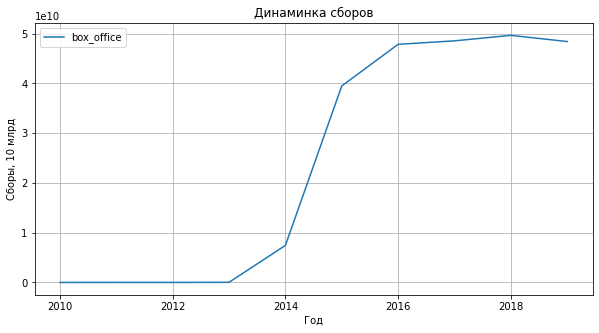

In [43]:
box_office_plot = (data.pivot_table(index='year_of_show', values='box_office', aggfunc='sum')
                   .plot(kind='line', figsize=(10, 5), grid=True))

box_office_plot.set_title('Динаминка сборов')
box_office_plot.set_xlabel('Год')
box_office_plot.set_ylabel('Сборы, 10 млрд')

plt.show()

Судя по графику,в датасете отсутствуют данные о сборах за 2010-2013 годы.

Поэтому наименьшее значение суммы сборов наблюдается в 2014 году - менее 10 миллиардов.
Зато видна корреляция с количеством фильмов - чем больше кино, тем больше сборы.

Наибольшие сборы зафиксированы в 2017 году, наравне с ним и следующие два года - 2018 и 2019. В эти годы выручка составила порядка 48-49 миллиардов.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

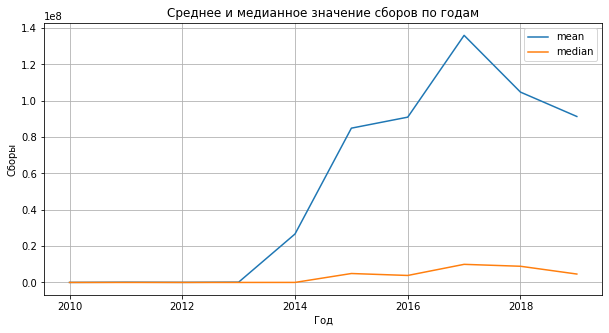

,year_of_show,mean,median
0,2010,23130,1700
1,2011,129383,3000
2,2012,54418,5560
3,2013,161955,3522
4,2014,26684415,18160
5,2015,84940570,4920933
6,2016,91000570,3846679
7,2017,136032793,9968340
8,2018,104785574,8911534
9,2019,91369262,4627798


In [44]:
box_office_info = data.pivot_table(index='year_of_show', values='box_office', aggfunc=['mean', 'median']).reset_index()
box_office_info.columns = ['year_of_show', 'mean', 'median']

box_office_plot = box_office_info.plot(x='year_of_show', y=['mean', 'median'], kind='line', figsize=(10, 5), grid=True)
box_office_plot.set_title('Среднее и медианное значение сборов по годам')
box_office_plot.set_xlabel('Год')
box_office_plot.set_ylabel('Сборы')

plt.show()
box_office_info

И снова сборы появляются только после 2013 года. Тем не менее, мы видим, что медиана сильно меньше среднего - это говорит о том, что многие фильмы собирают очень мало, искажая данные. 

Тем не менее, мы снова видим, что 2017 год был самым успешным с точки зрения сборов - в среднем около 137 млн.

Как мы можем заметить, действительно есть фильмы-гиганты, которые собирают огромные суммы. Они действительно завышают значение среднего, ибо бОльшая часть фильмов не собрала и миллионав в прокате. В то же время, такие фильмы (с низкими сборами) занижают значение медианы.

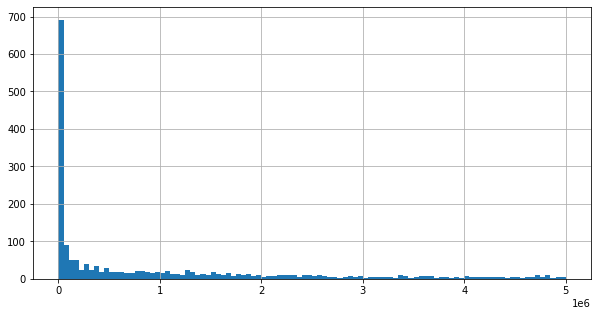

In [45]:
data['box_office'].hist(bins=100, range=(1, 5_000_000), figsize=(10, 5));

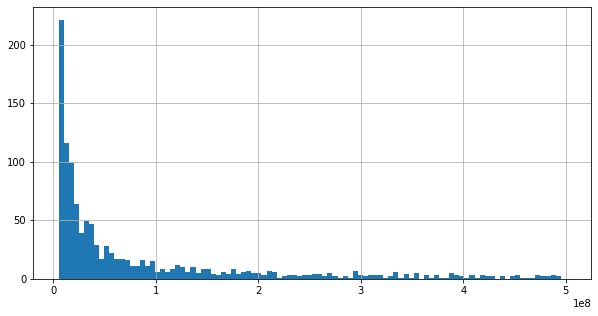

In [46]:
data['box_office'].hist(bins=100, range=(5_000_000, 500_000_000), figsize=(10, 5));

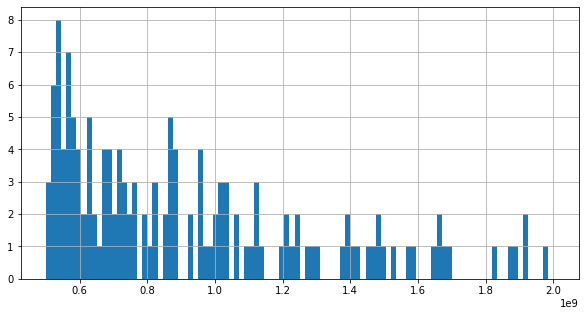

In [47]:
data['box_office'].hist(bins=100, range=(500_000_000, 2_000_000_000), figsize=(10, 5));

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для более короткого вывода немного исправим столбец `age_restriction`.

In [48]:
data['age_restriction'] = data['age_restriction'].replace({'«0+», для любой зрительской аудитории' : '«0+»',
                                      '«6+», для детей старше 6 лет' : '«6+»',
                                      '«12+», для детей старше 12 лет' : '«12+»',
                                      '«16+», для детей старше 16 лет' : '«16+»',
                                      '«18+», запрещено для детей' : '«18+»'})

data['age_restriction'].unique()

array(['«18+»,  запрещено для детей', '«6+»,  для детей старше 6 лет',
       '«12+»,  для детей старше 12 лет',
       '«16+»,  для детей старше 16 лет',
       '«0+»,  для любой зрительской аудитории'], dtype=object)

NameError: name 'pivot_data' is not defined

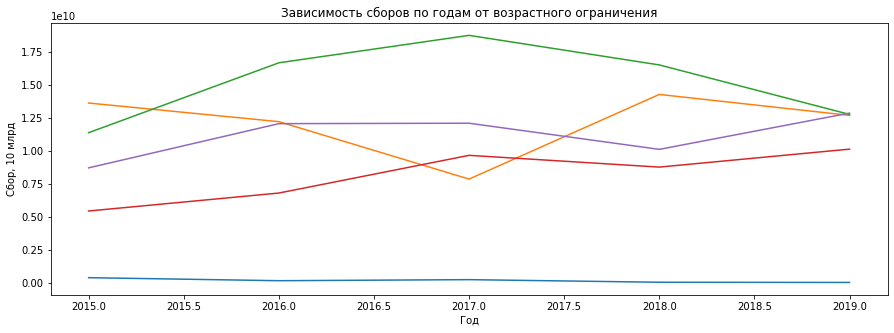

In [49]:
data_age = data.query('2015 <= year_of_show <= 2019').pivot_table(
    index='year_of_show',
    columns='age_restriction',
    values='box_office',
    aggfunc='sum'
).reset_index()

plt.figure(figsize=(15, 5))
for age_restriction in data_age.columns[1:]: 
    plt.plot(data_age['year_of_show'], data_age[age_restriction], label=age_restriction)

plt.title('Зависимость сборов по годам от возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Сбор, 10 млрд')
plt.xticks(pivot_data['year_of_show'])  # Убедитесь, что все годы отображаются на оси X
plt.grid(True)
plt.legend(title='Возрастное ограничение')
plt.show()

2015: почти 12 миллиардов собрали фильмы с возрастным ограничением 12+.

2016: 14 миллиардов принесли фильмы с цензом 16+.

2017: практически 19 миллиардов снова уходят на баланс фильмов для подростков (16+).

2018: 15 миллиардов опять принесли 16+.

2019: с небольшим отрывом от 12+, фильмы с цензом 16+ принесли 12.7 миллиардов.


Исходя из изученных данных, можно сделать вывод, что больше всего приносят фильмы для подростков (12-18 лет).
Больше всего за данный промежуток времени принесли 16+ - более 68 миллиардов рублей.

В целом, от года к году картина не меняется, но есть интересные изменения: объем сборов фильмов 18+ с каждым годом немного увеличивается, ровно как и 6+. \
С чем это может быть связано? Скорее всего, с количеством фильмов, которое выходит каждый следующий год - оно увеличивается. Соответственно, увеличиваются и сборы.

Исследование динамики выхода фильмов в прокат и их сборов в период с 2010 по 2019 год позволяет сделать несколько ключевых выводов:

1. **Общая динамика выхода фильмов:** Наиболее полно в датасете представлен 2019 год, в котором было зафиксировано почти 1000 фильмов. Это указывает на то, что данные за этот год наиболее полные и могут дать наиболее точное представление о состоянии кинопроката в этот период.

2. **Доля фильмов, вышедших в прокат:** Особенно выделяется 2016 год, в котором процент фильмов, вышедших в прокат, оказался выше, чем в другие годы. Это может свидетельствовать о более активной деятельности кинопрокатчиков и/или большем интересе аудитории к кинопродукции в этот период.

3. **Динамика сборов:** Наибольшие сборы были зафиксированы в 2017 году, что коррелирует с количеством вышедших фильмов. Это подтверждает предположение о том, что чем больше фильмов выходит в прокат, тем выше общие сборы.

4. **Средние и медианные сборы:** Наблюдается значительное различие между средними и медианными значениями сборов, что указывает на наличие фильмов-«аутсайдеров» с очень низкими сборами и фильмов-«блокбастеров» с очень высокими сборами. Это разнообразие подчеркивает неоднородность рынка кинопроката.

5. **Влияние возрастного ограничения на сборы:** Фильмы с возрастным ограничением 16+ показали наибольшие сборы в анализируемый период, что может свидетельствовать о высоком спросе на фильмы для подростковой аудитории. Также наблюдается постепенное увеличение сборов у фильмов с ограничением 18+ и 6+, что может быть связано с увеличением количества выходящих фильмов в этих категориях.

**Промежуточный вывод:** Анализ показывает, что кинопрокат в России в период с 2015 по 2019 год характеризуется ростом как количества фильмов, так и общих сборов. Особенно выделяется аудитория подростков (16+), фильмы для которой приносят наибольшие сборы. Эти данные могут быть полезны для кинопрокатчиков и дистрибьюторов при планировании релизов новых фильмов и формировании стратегии маркетинга.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала выделим фильмы с государственной поддержкой в отдельный датафрейм, чтобы было проще работать с этими данными.

In [ ]:
data_support = data.query('financing_source.isna() == False')
data_support.head(5)

Всего таких фильмов 327.
Для начала посмотрим, как распределяется рейтинг фильмов с государственной поддержкой.

In [ ]:
data_support_ratings_plot = data_support['ratings'].plot(bins=50, kind='hist', figsize=(10, 5), grid=True)

data_support_ratings_plot.set_title('Количество фильмов по рейтингу')
data_support_ratings_plot.set_xlabel('Рейтинг')
data_support_ratings_plot.set_ylabel('Количество фильмов')

plt.show()

Больше всего фильмов имеют рейтинг от 5 до 7. В целом, это вполне нормальный рейтинг для фильма, вне зависимости от того, финансирует его государство или нет.

Далее проверим окупаемость фильма. Что мы считаем окупившимся фильмом? Будем считать, что фильм окупился, если `box_office` больше, чем `budget`. Безусловно, стоит еще учитывать затраты на дистрибьюцию, рекламу и т.д., но обойдемся без этого и будем смотреть именно на цифры.

Напишем функцию, которая будет показывать, окупился фильм или нет:

In [ ]:
def is_payback(budget, box_office):
    if box_office > budget:
        return True
    else:
        return False
    
data_support['is_payback'] = data_support.apply(lambda x: is_payback(x['budget'], x['box_office']), axis=1)
data_support.head(5)

In [ ]:
len(data_support.query('is_payback == True')) / len(data_support) * 100

Из всех фильмов, которые профинансировало государство, окупились только 25%. Что, конечно, не самый хороший результат. 

Что можно сказать, исходя из изученных данных? Рейтинг у фильмов с гос.поддержкой достаточно посредственный (не очень высокий), и внушительная часть фильмов не окупилась в прокате. Но это и не удивительно - обычно создатели такого кино и не ставят цели окупиться.

##### Сколько средств выделяют на поддержку фильмов?

Посмотрим, сколько денег из бюджета выделялось на фильмы по годам:

In [ ]:
data_support_budget = data_support.pivot_table(index='year_of_show', values='budget', aggfunc='sum')

data_support_budget_plot = data_support_budget.plot(kind='line', figsize=(10, 5), grid=True)
data_support_budget_plot.set_title('Выделенные средства по годам')
data_support_budget_plot.set_xlabel('Год')
data_support_budget_plot.set_ylabel('Бюджет, 10 млрд')

plt.show()
data_support_budget

Объем выделяемых бюджетных средств (почти) неуклонно растет. Это легко объяснить - фильмом снимается больше с каждым годом. Соответственно, и финансировать приходится бОльшие объемы.

##### Возрастные ограничения

In [ ]:
data_support_age = data_support.pivot_table(index='age_restriction', values='budget', aggfunc='sum')

data_support_age_plot = data_support_age.plot(kind='bar', figsize=(10, 5), grid=True)
data_support_age_plot.set_title('Выделенные средства по возрастным ограничениям')
data_support_age_plot.set_xlabel('Возрастное ограничение')
data_support_age_plot.set_ylabel('Средства, 10 млрд')

plt.show()
data_support_age

Больше всего средств выделено на фильмы с ограничением 12+ - более 14 миллиардов. Приблизительно одинаковый объем был выделен на фильмы 6+ и 16+ - порядка 12 млрд.

Исходя из этих данных, можно сделать вывод о том, что государство заинтересовано в создании фильмов для несовершеннолетней аудитории. Вероятно, такие фильмы наиболее востребованы, ведь аудитория у них очень обширна.

##### Тип фильма

In [ ]:
data_support_type = data_support.pivot_table(index='type', values='is_payback', aggfunc=['count', 'sum'])
data_support_type.columns = ['Всего', 'Окупились']

data_support_type

Как и следовало ожидать, основная масса фильмов является художественными. 

Из анимационных окупилась почти половина - достаточно хороший результат. \
Сложно что-то сказать про документальные фильмы, имея только 1 пример. Но можно предположить, что такие фильмы действительно не окупаются - они не так интересны массовому зрителю.

С художественными фильмами тоже не все хорошо - менее 25% окупились. Это подтверждает исследования, проведенные в одном из прошлых пунктов.

Исследование фильмов с государственной поддержкой выявило несколько ключевых моментов:

1. **Распределение рейтингов**: Большинство фильмов с государственной поддержкой имеют рейтинги в диапазоне от 5 до 7, что является достаточно средним показателем. Это указывает на то, что фильмы с господдержкой в целом встречаются с умеренным одобрением со стороны аудитории.

2. **Окупаемость**: Только 25% фильмов с государственной поддержкой окупились, что является довольно низким показателем. Это подчеркивает, что большинство таких проектов не ставят своей целью получение коммерческой выгоды, а скорее направлены на достижение культурных, образовательных или социальных целей.

3. **Финансирование**: Объем выделяемых государством средств на поддержку кино растет с каждым годом, что свидетельствует о повышении интереса к развитию кинематографа. Особенно много средств выделяется на фильмы для несовершеннолетней аудитории (12+, 6+ и 16+), что подчеркивает стремление государства поддерживать создание контента, доступного и интересного широкой аудитории.

4. **Возрастные ограничения**: Большая часть средств направляется на фильмы с возрастным ограничением 12+, что указывает на желание государства поддерживать проекты, ориентированные на широкую аудиторию, включая подростков. Это также может отражать стремление к созданию фильмов, способствующих воспитанию и образованию молодежи.

5. **Типы фильмов**: Большинство поддержанных государством фильмов являются художественными, но среди анимационных фильмов наблюдается высокий процент окупаемости (почти половина), что может свидетельствовать о высоком интересе к анимации как среди детей, так и взрослых. Документальные фильмы, в свою очередь, представлены в очень малом количестве, что может указывать на их низкую коммерческую привлекательность для широкой аудитории.

**Промежуточный вывод**: Особое внимание уделяется фильмам для несовершеннолетней аудитории, что подчеркивает стремление к формированию положительных социальных и культурных ценностей.

### Шаг 5. Напишите общий вывод

**Общая динамика кинопроката:** Анализ данных показывает, что кинопрокат в России характеризуется ростом как количества фильмов, так и общих сборов, особенно в период с 2015 по 2019 год. Это указывает на увеличивающийся интерес аудитории к кинопродукции и активизацию деятельности кинопрокатчиков. Особенно выделяется аудитория подростков (16+), фильмы для которой приносят наибольшие сборы, что может служить важным ориентиром для кинопрокатчиков и дистрибьюторов при планировании релизов новых фильмов и формировании стратегии маркетинга.

**Государственная поддержка кино:** Исследование фильмов с государственной поддержкой выявило, что такие проекты часто не ставят своей целью получение коммерческой выгоды, а направлены на достижение культурных, образовательных или социальных целей. Большинство таких фильмов имеют средние рейтинги и низкий процент окупаемости, что подчеркивает их ориентацию не на коммерческий успех, а на вклад в культурное и социальное развитие общества. Особое внимание государства уделяется фильмам для несовершеннолетней аудитории, что отражает стремление к формированию положительных социальных и культурных ценностей среди молодежи.

**Типы фильмов и их окупаемость:** Среди поддержанных государством фильмов высокий процент окупаемости наблюдается у анимационных фильмов, что свидетельствует о высоком интересе к анимации как среди детей, так и взрослых. В то же время, документальные фильмы представлены в меньшем количестве и имеют низкую коммерческую привлекательность для широкой аудитории, что может указывать на их специфическую нишу в кинопроизводстве.

**Заключение:** В целом, анализ кинопроката и фильмов с государственной поддержкой в России показывает, что кинопроизводство и кинопрокат в стране развиваются, привлекая внимание различных аудиторий и получая поддержку со стороны государства. Государственная поддержка ориентирована на развитие культурного и образовательного контента, при этом особое внимание уделяется молодежной аудитории. Эти тенденции могут служить основой для дальнейшего развития кинопроизводства и кинопроката в России, с учетом как коммерческих, так и социально значимых аспектов.

На основе предоставленных данных и проведенного анализа можно сделать несколько ключевых общих выводов и предложить рекомендации для дальнейшего развития кинопроката и кинопроизводства в России.

**Общие выводы**:

1. **Рост кинопроката:** Анализ данных показывает положительную динамику в развитии кинопроката в России с 2015 по 2019 год, что выражается в увеличении количества фильмов, выходящих в прокат, и росте общих сборов. Это свидетельствует о растущем интересе аудитории к кинопродукции и потенциале рынка.

2. **Важность аудитории подростков:** Фильмы с возрастным ограничением 16+ показывают наибольшие сборы, что подчеркивает значимость этой аудитории для кинопроката. Это указывает на необходимость уделить особое внимание контенту, ориентированному на подростков, при планировании релизов новых фильмов.

3. **Разнообразие контента:** Наблюдается значительное разнообразие в кинопродукции, включая художественные, анимационные и документальные фильмы. Анимационные фильмы показывают высокий процент окупаемости, что указывает на их популярность среди всех возрастных групп.

**Рекомендации**:

1. **Фокус на подростковую аудиторию:** Учитывая высокие сборы фильмов с возрастным ограничением 16+, рекомендуется кинопрокатчикам и дистрибьюторам активнее работать над привлечением подростковой аудитории, в том числе через маркетинговые кампании и социальные сети.

2. **Расширение государственной поддержки:** Следует продолжать и расширять программы государственной поддержки кинопроизводства, особенно для проектов, нацеленных на несовершеннолетнюю аудиторию и проектов с высоким культурным и образовательным потенциалом.

3. **Инвестиции в анимационные фильмы:** Учитывая высокий процент окупаемости анимационных фильмов, рекомендуется увеличить инвестиции в этот сегмент, как один из наиболее перспективных на рынке.

4. **Качество и доступность:** Важно поддерживать высокое качество кинопродукции и ее доступность для широкой аудитории, включая разработку и продвижение фильмов, которые способствуют воспитанию и образованию молодежи.

5. **Анализ данных и адаптация:** Рекомендуется продолжать сбор и анализ данных о кинопрокате для адаптации стратегий развития кинопроизводства и кинопроката к меняющимся трендам и предпочтениям аудитории.

В заключение, данные и анализ показывают, что кинопрокат в России имеет большой потенциал для дальнейшего развития. Особое внимание следует уделить аудитории подростков, расширению государственной поддержки кинопроектов с высоким культурным и образовательным потенциалом, а также инвестициям в анимационные фильмы.